[[0.         3.         0.         2.        ]
 [4.         5.         1.15470054 3.        ]
 [1.         2.         2.23606798 2.        ]
 [6.         7.         4.00832467 5.        ]]


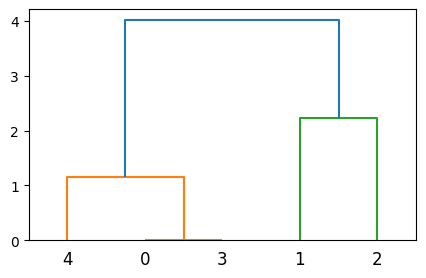

In [1]:
# 1、层次聚类

###cluster.py
#导入相应的包
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

'''
linkage(y, method=’single’, metric=’euclidean’) 共包含3个参数: 
1. y是距离矩阵,可以是1维压缩向量（距离向量），也可以是2维观测向量（坐标矩阵）。
若y是1维压缩向量，则y必须是n个初始观测值的组合，n是坐标矩阵中成对的观测值。
2. method是指计算类间距离的方法。

'''
'''
fcluster(Z, t, criterion=’inconsistent’, depth=2, R=None, monocrit=None) 
1.第一个参数Z是linkage得到的矩阵,记录了层次聚类的层次信息; 
2.t是一个聚类的阈值-“The threshold to apply when forming flat clusters”。
'''

X = [[1,2],[3,2],[4,4],[1,2],[1,3]]
Z = linkage(X, 'ward')
f = fcluster(Z,4,'distance')
fig = plt.figure(figsize=(5, 3))
dn = dendrogram(Z)
print(Z)
plt.show()


(150, 4)


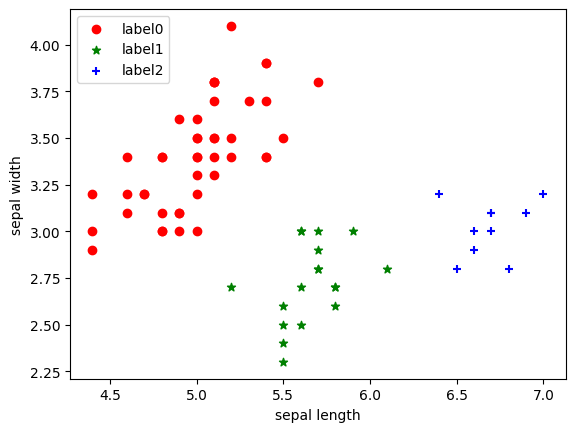

In [2]:
# 2、密度聚类

import matplotlib.pyplot as plt  
import numpy as np  
from sklearn import datasets 
from  sklearn.cluster import DBSCAN
 
iris = datasets.load_iris() 
X = iris.data[:, :4]  # #表示我们只取特征空间中的4个维度
print(X.shape)
# 绘制数据分布图
'''
plt.scatter(X[:, 0], X[:, 1], c="red", marker='o', label='see')  
plt.xlabel('sepal length')  
plt.ylabel('sepal width')  
plt.legend(loc=2)  
plt.show()  
'''

dbscan = DBSCAN(eps=0.4, min_samples=9)
dbscan.fit(X) 
label_pred = dbscan.labels_
 
# 绘制结果
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
plt.scatter(x0[:, 0], x0[:, 1], c="red", marker='o', label='label0')  
plt.scatter(x1[:, 0], x1[:, 1], c="green", marker='*', label='label1')  
plt.scatter(x2[:, 0], x2[:, 1], c="blue", marker='+', label='label2')  
plt.xlabel('sepal length')  
plt.ylabel('sepal width')  
plt.legend(loc=2)  
plt.show()  

In [1]:
# 3、SIFT 关键点

import cv2
import numpy as np

img = cv2.imread("C:\\Users\\83632\\Desktop\\lenna.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
keypoints, descriptor = sift.detectAndCompute(gray, None)

# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS对图像的每个关键点都绘制了圆圈和方向。
img = cv2.drawKeypoints(image=img, outImage=img, keypoints=keypoints,
                        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
                        color=(51, 163, 236))
                        
#img=cv2.drawKeypoints(gray,keypoints,img)

cv2.imshow('sift_keypoints', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
# 4、SIFT特征匹配

import cv2
import numpy as np
 
def drawMatchesKnn_cv2(img1_gray,kp1,img2_gray,kp2,goodMatch):
    h1, w1 = img1_gray.shape[:2]
    h2, w2 = img2_gray.shape[:2]
 
    vis = np.zeros((max(h1, h2), w1 + w2, 3), np.uint8)
    vis[:h1, :w1] = img1_gray
    vis[:h2, w1:w1 + w2] = img2_gray
 
    p1 = [kpp.queryIdx for kpp in goodMatch]
    p2 = [kpp.trainIdx for kpp in goodMatch]
 
    post1 = np.int32([kp1[pp].pt for pp in p1])
    post2 = np.int32([kp2[pp].pt for pp in p2]) + (w1, 0)
 
    for (x1, y1), (x2, y2) in zip(post1, post2):
        cv2.line(vis, (x1, y1), (x2, y2), (0,0,255))
 
    cv2.namedWindow("match",cv2.WINDOW_NORMAL)
    cv2.imshow("match", vis)
 
img1_gray = cv2.imread("C:\\Users\\83632\\Desktop\\iphone1.png")
img2_gray = cv2.imread("C:\\Users\\83632\\Desktop\\iphone2.png")
 
#sift = cv2.SIFT()
sift = cv2.xfeatures2d.SIFT_create()
#sift = cv2.SURF()
 
kp1, des1 = sift.detectAndCompute(img1_gray, None)
kp2, des2 = sift.detectAndCompute(img2_gray, None)
 
# BFmatcher with default parms
bf = cv2.BFMatcher(cv2.NORM_L2)
#opencv中knnMatch是一种蛮力匹配
#将待匹配图片的特征与目标图片中的全部特征全量遍历，找出相似度最高的前k个。
matches = bf.knnMatch(des1, des2, k = 2)

goodMatch = []
for m,n in matches:
    if m.distance < 0.50*n.distance:
        goodMatch.append(m)
 
drawMatchesKnn_cv2(img1_gray,kp1,img2_gray,kp2,goodMatch[:20])
 
cv2.waitKey(0)
cv2.destroyAllWindows()